In [2]:
import pandas as pd
import numpy as np
import warnings

In [3]:
warnings.filterwarnings(action='ignore')

In [4]:
df = pd.read_hdf('../data/tokenized_10thousand.hdf')

In [5]:
df.head()

,original,translation
0,"[○, 丙, 申, /, 十, 七, 日, 丙, 申, ,, 太, 祖, 卽, 位, 于, ...","[태조/NNP, 가/JKS, 수창/NNP, 궁/NNG, 에서/JKB, 왕위/NNP,..."
1,"[○, 上, 在, 潛, 邸, ,, 夢, 有, 神, 人, 執, 金, 尺, 自, 天, ...","[임금/NNG, 이/JKS, 잠/NNG, 저/NNG, 에/JKB, 있/VV, 을/E..."
2,"[○, 丁, 酉, /, 雨, 。, 前, 此, 久, 旱, ,, 及, 上, 卽, 位, ...","[비/NNG, 가/JKS, 내리/VV, 었/EP, 다/EF, ./SF, 이/NP, ..."
3,"[竊, 謂, 小, 邦, ,, 至, 恭, 愍, 王, 薨, 無, 嗣, ,, 逆, 臣, ...","[도평의사사/NNP, 및/MAJ, 대소/NNG, 신료와/NA, 한량/NNP, ·/S..."
4,"[○, 立, 義, 興, 親, 軍, 衛, ,, 罷, 都, 摠, 中, 外, 諸, 軍, ...","[의/NNG, 흥/NNG, 친군위/NNG, 를/JKO, 설치/NNG, 하/XSV, ..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99996 entries, 0 to 99995
Data columns (total 2 columns):
original       99996 non-null object
translation    99996 non-null object
dtypes: object(2)
memory usage: 2.3+ MB


In [7]:
origin, translation = df.original, df.translation

In [8]:
from collections import Counter

In [9]:
merged = []
origin.apply(lambda x:merged.extend(x))

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
99966    None
99967    None
99968    None
99969    None
99970    None
99971    None
99972    None
99973    None
99974    None
99975    None
99976    None
99977    None
99978    None
99979    None
99980    None
99981    None
99982    None
99983    None
99984    None
99985    None
99986    None
99987    None
99988    None
99989    None
99990    None
99991    None
99992    None
99993    None
99994    None
99995    None
Name: original, Length: 99996, dtype: object

In [10]:
origin_most = Counter(merged).most_common()[:100]

In [11]:
import seaborn as sns
from matplotlib import pyplot as plt

In [12]:
origin_most = pd.DataFrame(origin_most)

In [13]:
origin_most.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
0    100 non-null object
1    100 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [16]:
merged = []
translation.apply(lambda x:merged.extend(x))

0        None
1        None
2        None
3        None
4        None
5        None
6        None
7        None
8        None
9        None
10       None
11       None
12       None
13       None
14       None
15       None
16       None
17       None
18       None
19       None
20       None
21       None
22       None
23       None
24       None
25       None
26       None
27       None
28       None
29       None
         ... 
99966    None
99967    None
99968    None
99969    None
99970    None
99971    None
99972    None
99973    None
99974    None
99975    None
99976    None
99977    None
99978    None
99979    None
99980    None
99981    None
99982    None
99983    None
99984    None
99985    None
99986    None
99987    None
99988    None
99989    None
99990    None
99991    None
99992    None
99993    None
99994    None
99995    None
Name: translation, Length: 99996, dtype: object

In [20]:
trans_most = pd.DataFrame(Counter(merged).most_common()[:100])

In [22]:
trans_most.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
0    100 non-null object
1    100 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


In [30]:
origin_most.reset_index(inplace=True)
trans_most.reset_index(inplace=True)

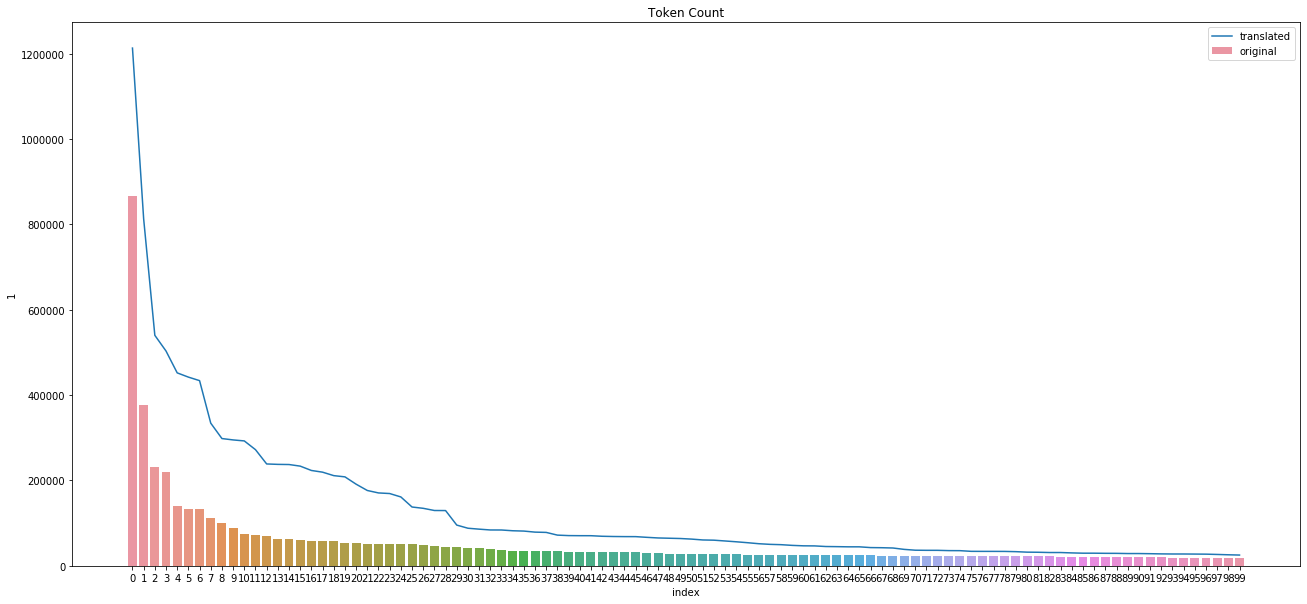

In [53]:
plt.figure(figsize=(22,10))
plt.axes(title='Token Count', xlabel=False)
sns.barplot(x ='index', y=1, data=origin_most, label='original')
sns.lineplot(x='index',y=1, data=trans_most, label='translated')
plt.savefig('./count')

In [61]:
origin_most.drop(columns='index', inplace=True)

origin_most.rename({0:'character', 1:'count'}, axis=1, inplace=True)

origin_most.to_json('./original_token_count.json')

In [69]:
trans_most.drop(columns='index', inplace=True)

trans_most.rename({0:'character', 1:'count'}, axis=1, inplace=True)

trans_most.to_json('./translated_token_count.json')

In [71]:
import json

In [84]:
with open('./original_token_count.json') as js:
    print(json.load(js))

{'character': {'0': ',', '1': '。', '2': '"', '3': '之', '4': '、', '5': ':', '6': '不', '7': '以', '8': '曰', '9': '○', '10': '人', '11': '其', '12': '上', '13': '事', '14': '爲', '15': '而', '16': '等', '17': '啓', '18': '者', '19': '一', '20': '可', '21': '有', '22': '也', '23': '則', '24': '於', '25': '臣', '26': '?', '27': '使', '28': '今', '29': '大', '30': '議', '31': '官', '32': '所', '33': '無', '34': '道', '35': '曹', '36': '此', '37': '府', '38': '言', '39': '司', '40': '十', '41': '子', '42': '令', '43': '李', '44': '日', '45': '請', '46': '/', '47': '如', '48': '從', '49': '政', '50': '命', '51': '下', '52': '行', '53': '知', '54': '三', '55': '未', '56': '于', '57': '何', '58': '金', '59': '亦', '60': '來', '61': '國', '62': '然', '63': '傳', '64': '禮', '65': '時', '66': '罪', '67': '二', '68': '自', '69': '安', '70': '中', '71': '及', '72': '軍', '73': '前', '74': '當', '75': '宗', '76': '書', '77': '至', '78': '非', '79': '後', '80': '文', '81': '年', '82': '若', '83': '皆', '84': '朝', '85': '承', '86': '又', '87': '是', '88': '已', '89': '殿', '90':